In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from ABCD_dnn_grid import prepinput, samplegrid, testABCDrate

In [2]:
htpt = np.load('data/htpt_fine_40to100.npy') #load histogram

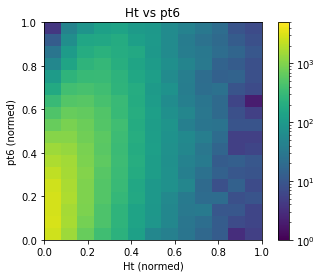

In [3]:
plt.imshow(htpt.T, norm=colors.LogNorm(vmin=1, vmax=5e3), origin='lower', extent = [0,1,0,1])
plt.ylabel('pt6 (normed)')
plt.xlabel('Ht (normed)')
plt.title('Ht vs pt6')
plt.colorbar()

In [4]:
ht_ctrl = 3
pt6_ctrl = 9
crlist = prepinput(htpt, ht_ctrl, pt6_ctrl) #maps both axis to [0,1]

In [5]:
def trainEnsemble(crlist, htpt, nrepeat, ctrl_bins, verbose=1):
    grid = np.zeros(htpt.shape)
    grid_std = np.zeros(htpt.shape)
    count = np.zeros(nrepeat)

    for i in range(nrepeat):
        model = testABCDrate(crlist)
        grid_i, grid_std_i = samplegrid(model, htpt)
        grid += grid_i
        grid_std += grid_std_i**2
        count[i] = grid_i[ctrl_bins[0]:,ctrl_bins[1]:].sum()
        
        if verbose==1: print(f'{i}-th training complete')
    
    return count, grid/nrepeat, np.sqrt(grid_std)/nrepeat

In [8]:
nrepeat = 30

with tf.device('CPU:0'):
    count, grid, grid_std = trainEnsemble(crlist, htpt, nrepeat, [ht_ctrl, pt6_ctrl])

0-th training complete
1-th training complete
2-th training complete
3-th training complete
4-th training complete
5-th training complete
6-th training complete
7-th training complete
8-th training complete
9-th training complete
10-th training complete
11-th training complete
12-th training complete
13-th training complete
14-th training complete
15-th training complete
16-th training complete
17-th training complete
18-th training complete
19-th training complete
20-th training complete
21-th training complete
22-th training complete
23-th training complete
24-th training complete
25-th training complete
26-th training complete
27-th training complete
28-th training complete
29-th training complete


In [9]:
bknd_true = htpt[ht_ctrl:, pt6_ctrl:].sum()
bknd_estimate = grid[ht_ctrl:, pt6_ctrl:].sum()
std_stat = np.sqrt((grid_std[ht_ctrl:, pt6_ctrl:]**2).sum())
std_training = np.std(count)
print(f'True background: {bknd_true}, Estimate: {bknd_estimate}, Stdev: {std_stat}, Training stdev: {std_training}')

True background: 9135.0, Estimate: 8931.366369163989, Stdev: 46.03634894324895, Training stdev: 954.3820592825672


Text(0.5, 1.0, 'Background - 30 training')

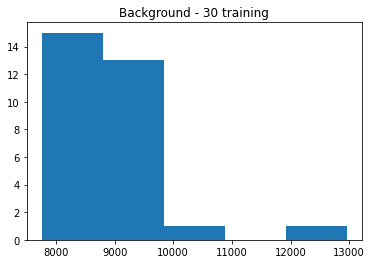

In [10]:
plt.hist(count, bins=5)
plt.title(f'Background - {nrepeat} training')

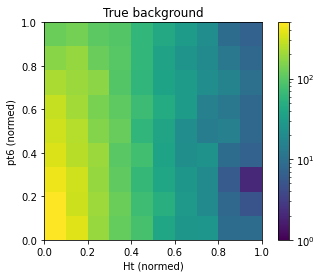

In [11]:
plt.imshow(htpt[ht_ctrl:, pt6_ctrl:].T, norm=colors.LogNorm(vmin=1, vmax=5e2), origin='lower', extent = [0,1,0,1])
plt.ylabel('pt6 (normed)')
plt.xlabel('Ht (normed)')
plt.title('True background')
plt.colorbar()

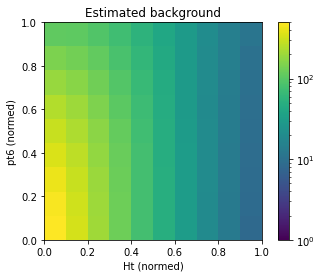

In [12]:
plt.imshow(grid[ht_ctrl:, pt6_ctrl:].T, norm=colors.LogNorm(vmin=1, vmax=5e2), origin='lower', extent = [0,1,0,1])
plt.ylabel('pt6 (normed)')
plt.xlabel('Ht (normed)')
plt.title('Estimated background')
plt.colorbar()

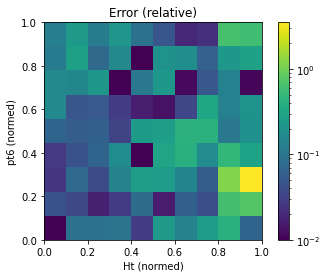

In [13]:
plt.imshow(np.abs(grid[ht_ctrl:, pt6_ctrl:]-htpt[ht_ctrl:, pt6_ctrl:]).T/htpt[ht_ctrl:, pt6_ctrl:].T, norm=colors.LogNorm(vmin=0.01), origin='lower', extent = [0,1,0,1])
plt.ylabel('pt6 (normed)')
plt.xlabel('Ht (normed)')
plt.title('Error (relative)')
plt.colorbar()

FileNotFoundError: [Errno 2] No such file or directory: 'figures/bknd_error_count_htpt_mode1_40to100_10iter.png'

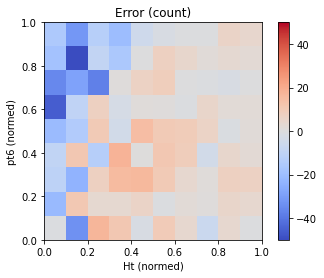

In [14]:
plt.imshow((grid[ht_ctrl:, pt6_ctrl:]-htpt[ht_ctrl:, pt6_ctrl:]).T, origin='lower', extent = [0,1,0,1], cmap='coolwarm', vmin = -50, vmax = 50)
plt.ylabel('pt6 (normed)')
plt.xlabel('Ht (normed)')
plt.title('Error (count)')
plt.colorbar()
plt.savefig('figures/bknd_error_count_htpt_mode1_40to100_10iter.png', dpi=200)